<a href="https://colab.research.google.com/github/santolina/pytorch_handbook/blob/master/PyTorchHandbook_chap3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torchvision
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import torchvision.transforms as transforms
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [33]:
# import dataset

train_dataset = torchvision.datasets.CIFAR10(root='./data/', 
                                             train=True,
                                             transform = transforms.ToTensor(),
                                             download=True
                                             )

test_dataset = torchvision.datasets.CIFAR10(root='./data/', 
                                            train=False,
                                            transform = transforms.ToTensor(),
                                            download = True
                                            )
                                
image, label = train_dataset[0]
print(image.size())
print(label)

Files already downloaded and verified
Files already downloaded and verified
torch.Size([3, 32, 32])
6


In [0]:
# define Dataloader

train_loader = torch.utils.data.DataLoader(
    dataset = train_dataset,
    batch_size = 64,
    shuffle = True, 
    num_workers=2
)

test_loader = torch.utils.data.DataLoader(
    dataset = test_dataset, 
    batch_size = 64,
    shuffle = False, 
    num_workers = 2
)

In [35]:
# check tensor's shape

for images, labels in train_loader:
  print(images.size())
  print(images[0].size())
  print(labels.size())
  # insert training code
  
  break

torch.Size([64, 3, 32, 32])
torch.Size([3, 32, 32])
torch.Size([64])


In [36]:
# define MLP network
num_classes = 10

class MLPNet(nn.Module):
  def __init__(self):
    super(MLPNet, self).__init__()
    self.fc1 = nn.Linear(32 * 32 * 3, 600)
    self.fc2 = nn.Linear(600, 600)
    self.fc3 = nn.Linear(600, num_classes)
    self.dropout1 = nn.Dropout2d(0.2)
    self.dropout2 = nn.Dropout2d(0.2)

  def forward(self, x):
    x = F.relu(self.fc1(x))
    x = self.dropout1(x)
    x = F.relu(self.fc2(x))
    x = self.dropout2(x)
    x = F.relu(self.fc3(x))
    return x

device = 'cuda' if torch.cuda.is_available() else 'cpu'
net = MLPNet().to(device)
device

'cuda'

In [0]:
# loss function and optimizer

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9, weight_decay=5e-4)


In [0]:
# training
def train(net, criterion, optimizer, train_loader, test_loader, num_epoch=50):

  train_loss_list = []
  train_acc_list = []
  val_loss_list = []
  val_acc_list = []

  for epoch in range(num_epoch):
    train_loss = 0
    train_acc = 0
    val_loss = 0
    val_acc = 0

    # train=====
    # change training mode
    net.train()

    for i, (images, labels) in enumerate(train_loader):
      images, labels = images.view(-1, 32*32*3).to(device), labels.to(device)

      # reset  gradient
      optimizer.zero_grad()

      # forward propagation
      outputs = net(images)

      # calc loss
      loss = criterion(outputs, labels)

      train_loss += loss.item()

      train_acc += (outputs.max(1)[1] == labels).sum().item()

      # back propagation
      loss.backward()

      # update weight
      optimizer.step()

    # average loss and accuracy
    avg_train_loss = train_loss / len(train_loader.dataset)
    avg_train_acc = train_acc / len(train_loader.dataset)

    # val====
    # change evaluation mode
    net.eval()

    with torch.no_grad():
      for images, labels in test_loader:
        images, labels = images.view(-1, 32*32*3).to(device), labels.to(device)

        outputs = net(images)
        loss = criterion(outputs, labels)

        val_loss += loss.item()
        val_acc += (outputs.max(1)[1]==labels).sum().item()
    
      avg_val_loss = val_loss / len(test_loader.dataset)
      avg_val_acc = val_acc / len(test_loader.dataset)

    # output loss and acc of training and test

    print('Epoc [{}/{}], loss: {loss:.4f}, val_loss: {val_loss:.4f}, val_acc: {val_acc:.4f}'.format(
      epoch+1, num_epoch, i+1, loss=avg_train_loss, val_loss=avg_val_loss, val_acc=avg_val_acc))

    # store data to plot graph
    train_loss_list.append(avg_train_loss)
    train_acc_list.append(avg_train_acc)
    val_loss_list.append(avg_val_loss)
    val_acc_list.append(avg_val_acc)

  return train_loss_list, train_acc_list, val_loss_list, val_acc_list, net, 


In [39]:
train_loss_list, train_acc_list, val_loss_list, val_acc_list, net = train(net, criterion, optimizer, train_loader, test_loader, num_epoch=50)

Epoc [1/50], loss: 0.0305, val_loss: 0.0293, val_acc: 0.3347
Epoc [2/50], loss: 0.0276, val_loss: 0.0260, val_acc: 0.4103
Epoc [3/50], loss: 0.0264, val_loss: 0.0256, val_acc: 0.4251
Epoc [4/50], loss: 0.0257, val_loss: 0.0244, val_acc: 0.4534
Epoc [5/50], loss: 0.0251, val_loss: 0.0245, val_acc: 0.4516
Epoc [6/50], loss: 0.0247, val_loss: 0.0239, val_acc: 0.4599
Epoc [7/50], loss: 0.0242, val_loss: 0.0236, val_acc: 0.4655
Epoc [8/50], loss: 0.0240, val_loss: 0.0229, val_acc: 0.4797
Epoc [9/50], loss: 0.0237, val_loss: 0.0228, val_acc: 0.4861
Epoc [10/50], loss: 0.0234, val_loss: 0.0230, val_acc: 0.4813
Epoc [11/50], loss: 0.0231, val_loss: 0.0227, val_acc: 0.4890
Epoc [12/50], loss: 0.0229, val_loss: 0.0223, val_acc: 0.4946
Epoc [13/50], loss: 0.0227, val_loss: 0.0225, val_acc: 0.4889
Epoc [14/50], loss: 0.0226, val_loss: 0.0226, val_acc: 0.4814
Epoc [15/50], loss: 0.0224, val_loss: 0.0223, val_acc: 0.4871
Epoc [16/50], loss: 0.0222, val_loss: 0.0220, val_acc: 0.4952
Epoc [17/50], los

# Simluation Results

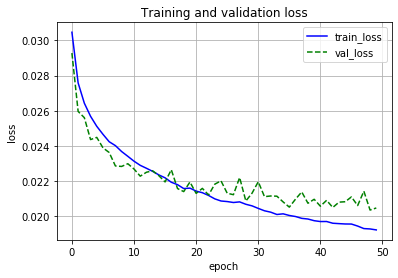

In [40]:
import matplotlib.pyplot as plot
%matplotlib inline

plt.figure()

plt.plot(range(num_epoch), train_loss_list, color='blue', linestyle='-', label='train_loss')
plt.plot(range(num_epoch), val_loss_list, color='green', linestyle='--', label='val_loss')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Training and validation loss')
plt.grid()
plt.show()


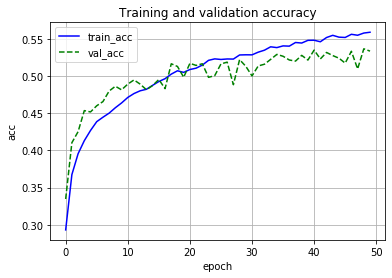

In [41]:
plt.figure()

plt.plot(range(num_epoch), train_acc_list, color='blue', linestyle='-', label='train_acc')
plt.plot(range(num_epoch), val_acc_list, color='green', linestyle='--', label='val_acc')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.title('Training and validation accuracy')
plt.grid()
plt.show()

In [42]:
# save netowrk
torch.save(net.state_dict(), 'net.ckpt')

# load
net2 = MLPNet().to(device)
net2.load_state_dict(torch.load('net.ckpt'))


<All keys matched successfully>

In [43]:
net2.eval()
with torch.no_grad():
  total = 0
  test_acc = 0
  for images, labels in test_loader:
    images, labels = images.view(-1, 32*32*3).to(device), labels.to(device)

    outputs = net2(images)
    test_acc += (outputs.max(1)[1]==labels).sum().item()
    total += labels.size(0)

  print('ACC: {}%'.format(100*test_acc/total))


ACC: 53.33%


In [44]:
print(outputs.max(1)[1]==labels)

tensor([ True, False,  True,  True,  True,  True, False,  True,  True, False,
         True,  True, False, False, False,  True], device='cuda:0')


In [45]:
print((outputs.max(1)[1]==labels).sum())

tensor(10, device='cuda:0')


In [46]:
print((outputs.max(1)[1]==labels).sum().item())

10
